**The data are from kaggle, and about test scores and other variables by the students in college Students from England. I explored which variable is correlated with the test scores.  I used averaged score for math, writing and reading subjects.**

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('StudentsPerformance.csv')
print('the data size is',df.size)
print(df.head())
df.columns

the data size is 8000
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

## Scores by gender

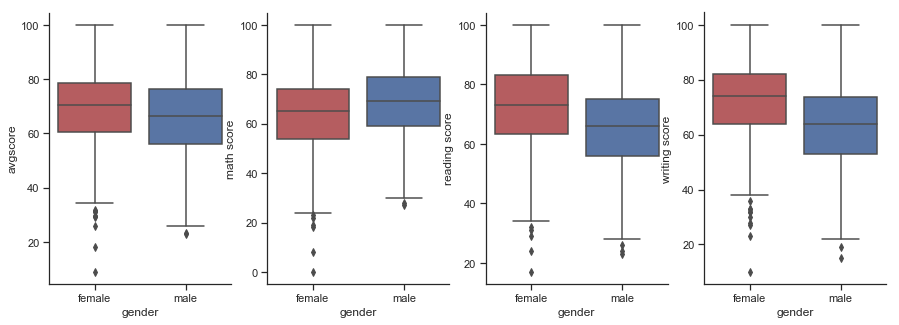

In [10]:
f, axes = plt.subplots(1, 4, figsize=(15,5))
sns.despine()
# add averaged score
df['avgscore']=df[['math score','reading score','writing score']].mean(axis=1)

data=df[['gender','math score','reading score','writing score','avgscore']]
sns.set(style='ticks')
sns.catplot(x='gender',y='avgscore',kind='box',data=data,palette=sns.color_palette(['r', 'b']),ax=axes[0])
sns.catplot(x='gender',y='math score',kind='box',data=data,palette=sns.color_palette(['r', 'b']),ax=axes[1])
sns.catplot(x='gender',y='reading score',kind='box',data=data,palette=sns.color_palette(['r', 'b']),ax=axes[2])
sns.catplot(x='gender',y='writing score',kind='box',data=data,palette=sns.color_palette(['r', 'b']),ax=axes[3])
# g1.set_ylabels('Avereaged score')
# g.set_xlabels('')
# plt.title('Math score by gender')
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.show()

## Score by parental level of education

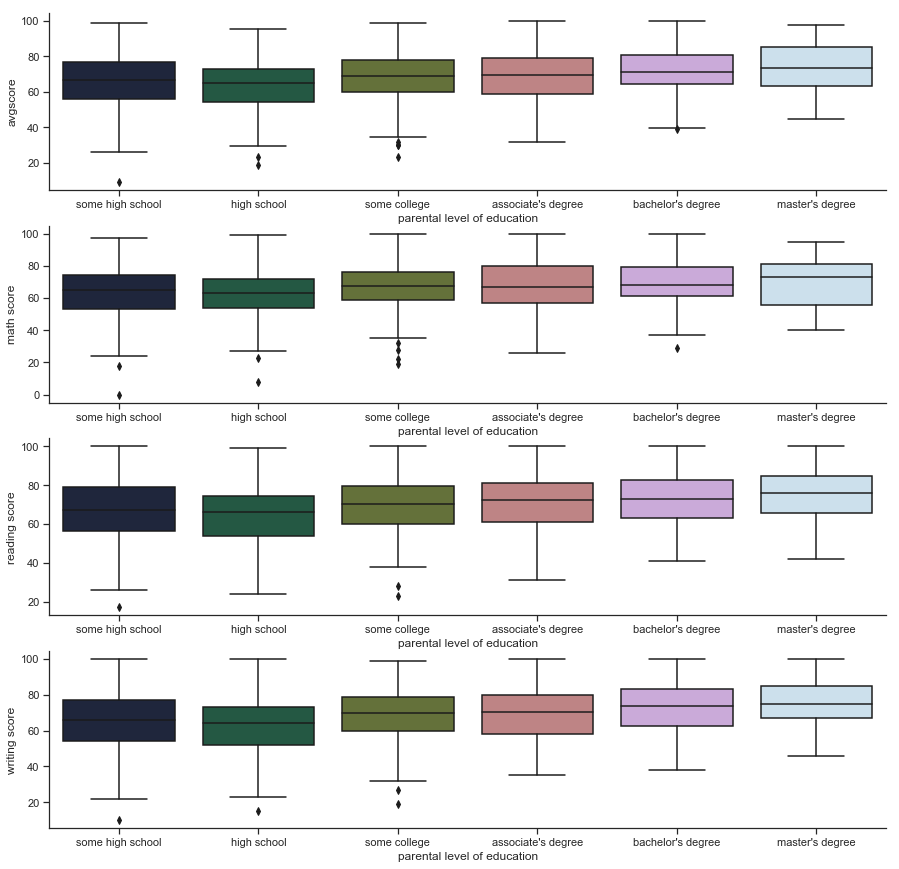

In [12]:
f, axes= plt.subplots(4,1,figsize=(15,15))
sns.set(style='ticks')
sns.despine()
sns.catplot(x='parental level of education',y='avgscore',kind='box',palette=sns.color_palette('cubehelix'),order=['some high school','high school','some college','associate\'s degree','bachelor\'s degree','master\'s degree'],data=df,ax=axes[0])
sns.catplot(x='parental level of education',y='math score',kind='box',palette=sns.color_palette('cubehelix'),order=['some high school','high school','some college','associate\'s degree','bachelor\'s degree','master\'s degree'],data=df,ax=axes[1])
sns.catplot(x='parental level of education',y='reading score',kind='box',palette=sns.color_palette('cubehelix'),order=['some high school','high school','some college','associate\'s degree','bachelor\'s degree','master\'s degree'],data=df,ax=axes[2])
sns.catplot(x='parental level of education',y='writing score',kind='box',palette=sns.color_palette('cubehelix'),order=['some high school','high school','some college','associate\'s degree','bachelor\'s degree','master\'s degree'],data=df,ax=axes[3])
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.show()

## Score by lunch

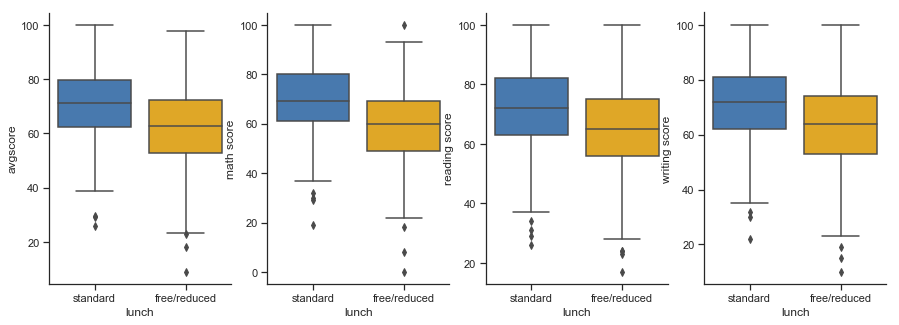

lunch
free/reduced    62.199061
standard        70.837209
Name: avgscore, dtype: float64

In [15]:
f,axes=plt.subplots(1,4,figsize=(15,5))
sns.despine()
sns.catplot(x='lunch',y='avgscore',data=df,kind='box',palette=sns.xkcd_palette(["windows blue", "amber"]),ax=axes[0])
sns.catplot(x='lunch',y='math score',data=df,kind='box',palette=sns.xkcd_palette(["windows blue", "amber"]),ax=axes[1])
sns.catplot(x='lunch',y='reading score',data=df,kind='box',palette=sns.xkcd_palette(["windows blue", "amber"]),ax=axes[2])
sns.catplot(x='lunch',y='writing score',data=df,kind='box',palette=sns.xkcd_palette(["windows blue", "amber"]),ax=axes[3])
plt.close(2); plt.close(3); plt.close(4);plt.close(5);
plt.show()
df['avgscore'].groupby(df['lunch']).mean()

## Score by test preparation score

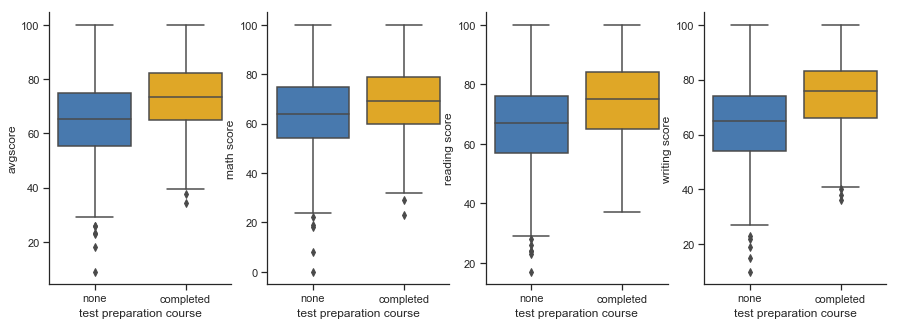

test preparation course
completed    72.669460
none         65.038941
Name: avgscore, dtype: float64

In [16]:
f,axes=plt.subplots(1,4,figsize=(15,5))
sns.despine()

sns.catplot(x='test preparation course',y='avgscore',data=df,kind='box',palette=sns.xkcd_palette(["windows blue", "amber"]),ax=axes[0])
sns.catplot(x='test preparation course',y='math score',data=df,kind='box',palette=sns.xkcd_palette(["windows blue", "amber"]),ax=axes[1])
sns.catplot(x='test preparation course',y='reading score',data=df,kind='box',palette=sns.xkcd_palette(["windows blue", "amber"]),ax=axes[2])
sns.catplot(x='test preparation course',y='writing score',data=df,kind='box',palette=sns.xkcd_palette(["windows blue", "amber"]),ax=axes[3])

plt.close(2); plt.close(3); plt.close(4);plt.close(5);
plt.show()

df['avgscore'].groupby(df['test preparation course']).mean()

## Background

    When exploring the variables which can be influence the test scores, whether completing test preparation course or not has relatively high impact on scores although it could not reach statistical significance.(course completed: 72.67, none: 65.04)
    However, when controlling other varibles which could be correlated with prep course variable , the effect of it could disappear or even be enhanced and become significant. 

## Research question

    Is taking test preparation course important for test scores? Needless to say, test scores are highly important for students, and it is needed to find influential factors on the scores besides instinct variables such as social economy status which is hard to change. In retrospective analsis, the test prep course variable seemed to play a role on test scores(math, reading, and writing). Therefore, in order to examine the only effect of prep course variable, we could conduct an experiment controlling other variables. 

## Hypothesis
    
    Students who completed test preparation course will have higher test scores than students who didn't. 
    
## Methods

    Here A/B manipulation is employed. Assign students randomly into prep group or non-prep group. Students in prep condition have to complete prep course before tests, and the others don't take the course. All subjects including math, reading and writing are covered in the course. The varible of interest is averaged test score for the three subjects above. 
    We will compare the scores between the two groups before and after treatment. In addition, we will also include gender, race/ethnicity, parental level of education, and lunch variable as covariates and conduct ANCOVA (Analysis of Variance with covariates)
    If the scores will be significantly different between the two groups after the treatment (p-value < .05), conclude that taking prep course has effective and recommend the course to take for all students.